In [379]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to change the path if needed.)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read the School Data and Student Data and store into a Pandas DataFrame
school_data_df = pd.read_csv(school_data_to_load)
student_data_df = pd.read_csv(student_data_to_load)

# Cleaning Student Names and Replacing Substrings in a Python String
# Add each prefix and suffix to remove to a list.
prefixes_suffixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss ", " MD", " DDS", " DVM", " PhD"]

# Iterate through the words in the "prefixes_suffixes" list and replace them with an empty space, "".
for word in prefixes_suffixes:
    student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")

# Check names.
student_data_df.head(10)

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
5,5,Bryan Miranda,M,9th,Huang High School,94,94
6,6,Sheena Carter,F,11th,Huang High School,82,80
7,7,Nicole Baker,F,12th,Huang High School,96,69
8,8,Michael Roth,M,10th,Huang High School,95,87
9,9,Matthew Greene,M,10th,Huang High School,96,84


## Deliverable 1: Replace the reading and math scores.

### Replace the 9th grade reading and math scores at Thomas High School with NaN.

In [380]:
# Install numpy using conda install numpy or pip install numpy. 
# Step 1. Import numpy as np.
import numpy as np

In [381]:
# Step 2. Use the loc method on the student_data_df to select all the reading scores from the 9th grade at Thomas High School and replace them with NaN.

student_data_df.loc[(student_data_df.grade == "9th") & (student_data_df.school_name == "Thomas High School"), "reading_score"]= np.nan
#student_data_df

In [382]:
#  Step 3. Refactor the code in Step 2 to replace the math scores with NaN.
student_data_df.loc[(student_data_df.grade == "9th") & (student_data_df.school_name == "Thomas High School"), "math_score"]=np.nan
student_data_df.tail()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
39165,39165,Donna Howard,F,12th,Thomas High School,99.0,90.0
39166,39166,Dawn Bell,F,10th,Thomas High School,95.0,70.0
39167,39167,Rebecca Tanner,F,9th,Thomas High School,NaN,NaN
39168,39168,Desiree Kidd,F,10th,Thomas High School,99.0,90.0
39169,39169,Carolyn Jackson,F,11th,Thomas High School,95.0,75.0


In [383]:
#  Step 4. Check the student data for NaN's. 
student_check_df = student_data_df[(student_data_df.grade == '9th') & (student_data_df.school_name == "Thomas High School")]
student_check_df


,Student ID,student_name,gender,grade,school_name,reading_score,math_score
37537,37537,Erik Snyder,M,9th,Thomas High School,NaN,NaN
37538,37538,Tanya Martinez,F,9th,Thomas High School,NaN,NaN
37539,37539,Noah Erickson,M,9th,Thomas High School,NaN,NaN
37540,37540,Austin Meyer,M,9th,Thomas High School,NaN,NaN
37543,37543,Madison Hampton,F,9th,Thomas High School,NaN,NaN
...,...,...,...,...,...,...,...
39152,39152,Lori Moore,F,9th,Thomas High School,NaN,NaN
39153,39153,William Hubbard,M,9th,Thomas High School,NaN,NaN
39157,39157,Kristen Gonzalez,F,9th,Thomas High School,NaN,NaN
39164,39164,Joseph Anthony,M,9th,Thomas High School,NaN,NaN


## Deliverable 2 : Repeat the school district analysis

### District Summary

In [384]:
# Combine the data into a single dataset
school_data_complete_df = pd.merge(student_data_df, school_data_df, how="left", on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66.0,79.0,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94.0,61.0,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90.0,60.0,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67.0,58.0,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97.0,84.0,0,District,2917,1910635


In [385]:
# Calculate the Totals (Schools and Students)
school_count = len(school_data_complete_df["school_name"].unique())
student_count = school_data_complete_df["Student ID"].count()

# Calculate the Total Budget
total_budget = school_data_df["budget"].sum()

In [386]:
# Calculate the Average Scores using the "clean_student_data".
#average_reading_score = school_data_complete_df["reading_score"].mean()
average_reading_score = np.nanmean(school_data_complete_df["reading_score"])


#average_math_score = school_data_complete_df["math_score"].mean()
average_math_score = np.nanmean(school_data_complete_df["math_score"])

print(average_reading_score)
print(average_math_score)

81.85579580976001
78.93053295099331


In [387]:
# Step 1. Get the number of students that are in ninth grade at Thomas High School.
# These students have no grades. 

ths_9th_count = school_data_complete_df.loc[(student_data_df.grade == "9th") & (student_data_df.school_name == "Thomas High School")].count()["student_name"]
#ths_9th_count
                 
# Get the total student count; given 
student_count = school_data_complete_df["Student ID"].count()
#student_count

# Step 2. Subtract the number of students that are in ninth grade at 
# Thomas High School from the total student count to get the new total student count.

student_new_count = (student_count - ths_9th_count)
student_new_count


38709

In [388]:
# Calculate the passing rates using the "clean_student_data".
passing_math_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)].count()["student_name"]
passing_reading_count = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)].count()["student_name"]

print(passing_math_count)
print(passing_reading_count)

28939
33158


In [389]:
# Step 3. Calculate the passing percentages with the new total student count.

# Calculate the percent that passed math.
passing_math_percentage = passing_math_count / float(student_new_count) * 100

# Calculate the percent that passed reading.
passing_reading_percentage = passing_reading_count / float(student_new_count) * 100

print(passing_math_percentage)
print(passing_reading_percentage)


74.76039164018704
85.6596657108166


In [390]:
# Calculate the students who passed both reading and math.
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)
                                               & (school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students that passed both reading and math.
overall_passing_math_reading_count = passing_math_reading["student_name"].count()


# Step 4.Calculate the overall passing percentage with new total student count.
# Calculate the overall passing percentage.
overall_passing_percentage = overall_passing_math_reading_count / float(student_new_count) * 100
overall_passing_percentage


64.85571830840374

In [391]:
# Create a DataFrame
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count, 
          "Total Students": student_count, 
          "Total Budget": total_budget,
          "Average Math Score": average_math_score, 
          "Average Reading Score": average_reading_score,
          "% Passing Math": passing_math_percentage,
         "% Passing Reading": passing_reading_percentage,
        "% Overall Passing": overall_passing_percentage}])



# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
# Format the "Total Budget" to have the comma for a thousands separator, a decimal separator and a "$".
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
# Format the columns.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.1f}".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.1f}".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.1f}".format)

# Display the data frame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.9,81.9,74.8,85.7,64.9


##  School Summary

In [392]:
# Determine the School Type
per_school_types = school_data_df.set_index(["school_name"])["type"]

# Calculate the total student count.
per_school_counts = school_data_complete_df["school_name"].value_counts()

# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete_df.groupby(["school_name"]).mean()["budget"]
# Calculate the per capita spending.
per_school_capita = per_school_budget / per_school_counts

# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

# Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]
per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100
per_school_passing_reading = per_school_passing_reading / per_school_counts * 100

# Calculate the students who passed both reading and math.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)
                                               & (school_data_complete_df["math_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100

In [393]:
# Create summary dataframe

per_school_summary_df = pd.DataFrame({
    "School Type": per_school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "% Passing Math": per_school_passing_math,
    "% Passing Reading": per_school_passing_reading,
    "% Overall Passing": per_overall_passing_percentage})

# per_school_summary_df.head()

In [394]:
# Format the Total School Budget and the Per Student Budget
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)

# Display the data frame
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [395]:
# Step 5.  Get the number of 10th-12th graders from Thomas High School (THS).
ths_10th_12th_count = school_data_complete_df.loc[(student_data_df.grade != "9th") & (student_data_df.school_name == "Thomas High School")].count()["student_name"]
ths_10th_12th_count

1174

In [396]:
# Step 6. Get all the students passing math from THS

# Calculate the passing scores by creating a filtered DataFrame.
ths_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70) & 
                                                  (student_data_df.school_name == "Thomas High School")].count()["Student ID"]
ths_passing_math


1094

In [397]:
# Step 7. Get all the students passing reading from THS

ths_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70) & 
                                                     (student_data_df.school_name == "Thomas High School")].count()["Student ID"]
ths_passing_reading

1139

In [398]:
# Step 8. Get all the students passing math and reading from THS
ths_passing_math_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)
                                               & (school_data_complete_df["math_score"] >= 70)
                                               & (student_data_df.school_name == "Thomas High School")].count()["Student ID"]
ths_passing_math_reading

1064

In [399]:
# Step 9. Calculate the percentage of 10th-12th grade students passing math from Thomas High School. 

ths_passing_math_percentage = ths_passing_math / ths_10th_12th_count * 100
ths_passing_math_percentage

93.18568994889267

In [400]:
# Step 10. Calculate the percentage of 10th-12th grade students passing reading from Thomas High School.
ths_passing_reading_percentage = ths_passing_reading / ths_10th_12th_count * 100
ths_passing_reading_percentage

97.01873935264055

In [401]:
# Step 11. Calculate the overall passing percentage of 10th-12th grade from Thomas High School. 
ths_passing_math_reading_percentage = ths_passing_math_reading / ths_10th_12th_count * 100
ths_passing_math_reading_percentage

90.63032367972743

In [402]:
# Step 12. Replace the passing math percent for Thomas High School in the per_school_summary_df.
per_school_summary_df.iloc[12,6] = ths_passing_math_percentage

In [403]:
# Step 13. Replace the passing reading percentage for Thomas High School in the per_school_summary_df.
per_school_summary_df.iloc[12,7] = ths_passing_reading_percentage

In [404]:
# Step 14. Replace the overall passing percentage for Thomas High School in the per_school_summary_df.
per_school_summary_df.iloc[12,8] = ths_passing_math_reading_percentage

In [405]:
# per_school_summary_df
per_school_summary_df.tail(3)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.350937,83.896082,93.185690,97.018739,90.630324
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Wright High School,Charter,1800,"$1,049,400.00",$583.00,83.682222,83.955000,93.333333,96.611111,90.333333


## High and Low Performing Schools 

In [406]:
# Sort and show top five schools.
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)

top_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.350937,83.896082,93.185690,97.018739,90.630324
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [407]:
# Sort and show top five schools. DO THEY MEAN BOTTOM 5 SCHOOLS????
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)

# Format the DataFrame 
bottom_schools["Average Math Score"] = bottom_schools["Average Math Score"].map("{:.1f}".format)

bottom_schools["Average Reading Score"] = bottom_schools["Average Reading Score"].map("{:.1f}".format)

bottom_schools["% Passing Math"] = bottom_schools["% Passing Math"].map("{:.1f}".format)

bottom_schools["% Passing Reading"] = bottom_schools["% Passing Reading"].map("{:.1f}".format)

bottom_schools["% Overall Passing"] = bottom_schools["% Overall Passing"].map("{:.1f}".format)

bottom_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.8,80.7,66.4,80.2,53.0
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.7,81.2,66.0,80.7,53.2
Huang High School,District,2917,"$1,910,635.00",$655.00,76.6,81.2,65.7,81.3,53.5
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.3,80.9,66.8,80.9,53.5
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.1,81.0,66.1,81.2,53.5


## Math and Reading Scores by Grade

In [408]:
# Create a Series of scores by grade levels using conditionals.
ninth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "9th")]

tenth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "10th")]

eleventh_graders = school_data_complete_df[(school_data_complete_df["grade"] == "11th")]

twelfth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "12th")]


# Group each school Series by the school name for the average math score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]

tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]

eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]

twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

# Group each school Series by the school name for the average reading score.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]

tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]

eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]

twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]


In [442]:
# Combine each Series for average math scores by school into single data frame.
math_scores_by_grade = pd.DataFrame({
               "9th": ninth_grade_math_scores,
               "10th": tenth_grade_math_scores,
               "11th": eleventh_grade_math_scores,
               "12th": twelfth_grade_math_scores})

math_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [443]:
# Combine each Series for average reading scores by school into single data frame.
reading_scores_by_grade = pd.DataFrame({
              "9th": ninth_grade_reading_scores,
              "10th": tenth_grade_reading_scores,
              "11th": eleventh_grade_reading_scores,
              "12th": twelfth_grade_reading_scores})

reading_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [411]:
# Format each grade column.
math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.1f}".format)
math_scores_by_grade["10th"] = math_scores_by_grade["10th"].map("{:.1f}".format)
math_scores_by_grade["11th"] = math_scores_by_grade["11th"].map("{:.1f}".format)
math_scores_by_grade["12th"] = math_scores_by_grade["12th"].map("{:.1f}".format)

# Make sure the columns are in the correct order.
math_scores_by_grade = math_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]


In [444]:
# Remove the index.
math_scores_by_grade.index.name = None

# Display the data frame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


In [413]:
# Format each grade column.
reading_scores_by_grade["9th"] = reading_scores_by_grade["9th"].map("{:.1f}".format)
reading_scores_by_grade["10th"] = reading_scores_by_grade["10th"].map("{:.1f}".format)
reading_scores_by_grade["11th"] = reading_scores_by_grade["11th"].map("{:.1f}".format)
reading_scores_by_grade["12th"] = reading_scores_by_grade["12th"].map("{:.1f}".format)

# Make sure the columns are in the correct order.
reading_scores_by_grade = reading_scores_by_grade[
                 ["9th", "10th", "11th", "12th"]]


In [445]:
## Remove the index.
reading_scores_by_grade.index.name = None

# Display the data frame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Additional District Summary by Grade Level: Reading and Math Averages

In [415]:
#Group each school Series by district for the average math score.
ninth_math_dist_scores = ninth_graders.mean()["math_score"]
tenth_math_dist_scores = tenth_graders.mean()["math_score"]
eleventh_math_dist_scores = eleventh_graders.mean()["math_score"]
twelfth_math_dist_scores = twelfth_graders.mean()["math_score"]

ninth_reading_dist_scores = ninth_graders.mean()["reading_score"]
tenth_reading_dist_scores = tenth_graders.mean()["reading_score"]
eleventh_reading_dist_scores = eleventh_graders.mean()["reading_score"]
twelfth_reading_dist_scores = twelfth_graders.mean()["reading_score"]
twelfth_reading_dist_scores

81.81985061400177

In [416]:
# Combine each variable for District Summary.
district_scores_by_grade = pd.DataFrame([{
              "9th Average Math": ninth_math_dist_scores,
              "10th Average Math": tenth_math_dist_scores,
              "11th Average Math": eleventh_math_dist_scores,
              "12th Average Math": twelfth_math_dist_scores,
              "9th Average Reading": ninth_reading_dist_scores,
              "10th Average Reading": tenth_reading_dist_scores,
              "11th Average Reading": eleventh_reading_dist_scores,
              "12th Average Reading": twelfth_reading_dist_scores}])

district_scores_by_grade.index.name = None

# Format the DataFrame 
district_scores_by_grade["9th Average Math"] = district_scores_by_grade["9th Average Math"].map("{:.3f}".format)
district_scores_by_grade["10th Average Math"] = district_scores_by_grade["10th Average Math"].map("{:.3f}".format)
district_scores_by_grade["11th Average Math"] = district_scores_by_grade["11th Average Math"].map("{:.3f}".format)
district_scores_by_grade["12th Average Math"] = district_scores_by_grade["12th Average Math"].map("{:.3f}".format)
district_scores_by_grade["9th Average Reading"] = district_scores_by_grade["9th Average Reading"].map("{:.3f}".format)
district_scores_by_grade["10th Average Reading"] = district_scores_by_grade["10th Average Reading"].map("{:.3f}".format)
district_scores_by_grade["11th Average Reading"] = district_scores_by_grade["11th Average Reading"].map("{:.3f}".format)
district_scores_by_grade["12th Average Reading"] = district_scores_by_grade["12th Average Reading"].map("{:.3f}".format)

district_scores_by_grade


,9th Average Math,10th Average Math,11th Average Math,12th Average Math,9th Average Reading,10th Average Reading,11th Average Reading,12th Average Reading
0,78.740,78.941,79.084,78.993,81.838,81.874,81.886,81.820


## Scores by School Spending

In [417]:
# Establish the spending bins and group names.
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$584", "$585-629", "$630-644", "$645-675"]

# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=group_names)

per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$584
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-629


In [418]:
# Calculate averages for the desired columns. 
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]

spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]

spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]

spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]

overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]


In [419]:
# Create the DataFrame
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.455399,83.933814,93.460096,96.610877,90.369459
$585-629,81.899826,83.155286,87.133538,92.718205,81.418596
$630-644,78.502002,81.636261,73.462589,84.319261,62.778233
$645-675,76.997210,81.027843,66.164813,81.133951,53.526855


In [420]:
# Format the DataFrame 
spending_summary_df["Average Math Score"] = spending_summary_df["Average Math Score"].map("{:.1f}".format)

spending_summary_df["Average Reading Score"] = spending_summary_df["Average Reading Score"].map("{:.1f}".format)

spending_summary_df["% Passing Math"] = spending_summary_df["% Passing Math"].map("{:.1f}".format)

spending_summary_df["% Passing Reading"] = spending_summary_df["% Passing Reading"].map("{:.1f}".format)

spending_summary_df["% Overall Passing"] = spending_summary_df["% Overall Passing"].map("{:.1f}".format)

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93.5,96.6,90.4
$585-629,81.9,83.2,87.1,92.7,81.4
$630-644,78.5,81.6,73.5,84.3,62.8
$645-675,77.0,81.0,66.2,81.1,53.5


## Scores by School Size

In [421]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Categorize spending based on the bins.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=group_names)

per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629,Medium (1000-2000)


In [422]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]

size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Reading Score"]

size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]

size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]

size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

In [423]:
# Assemble into DataFrame. 
size_summary_df = pd.DataFrame({
          "Average Math Score" : size_math_scores,
          "Average Reading Score": size_reading_scores,
          "% Passing Math": size_passing_math,
          "% Passing Reading": size_passing_reading,
          "% Overall Passing": size_overall_passing})

#size_summary_df

In [424]:
# Format the DataFrame  
size_summary_df["Average Math Score"] = size_summary_df["Average Math Score"].map("{:.1f}".format)

size_summary_df["Average Reading Score"] = size_summary_df["Average Reading Score"].map("{:.1f}".format)

size_summary_df["% Passing Math"] = size_summary_df["% Passing Math"].map("{:.1f}".format)

size_summary_df["% Passing Reading"] = size_summary_df["% Passing Reading"].map("{:.1f}".format)

size_summary_df["% Overall Passing"] = size_summary_df["% Overall Passing"].map("{:.1f}".format)

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,93.6,96.1,89.9
Medium (1000-2000),83.4,83.9,93.6,96.7,90.6
Large (2000-5000),77.7,81.3,70.0,82.8,58.3


## Scores by School Type

In [425]:
# Calculate averages for the desired columns. 
type_math_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Math Score"]

type_reading_scores = per_school_summary_df.groupby(["School Type"]).mean()["Average Reading Score"]

type_passing_math = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Math"]

type_passing_reading = per_school_summary_df.groupby(["School Type"]).mean()["% Passing Reading"]

type_overall_passing = per_school_summary_df.groupby(["School Type"]).mean()["% Overall Passing"]


In [426]:
# Assemble into DataFrame. 
type_summary_df = pd.DataFrame({
          "Average Math Score" : type_math_scores,
          "Average Reading Score": type_reading_scores,
          "% Passing Math": type_passing_math,
          "% Passing Reading": type_passing_reading,
          "% Overall Passing": type_overall_passing})

#type_summary_df

In [427]:
# # Format the DataFrame 
type_summary_df["Average Math Score"] = type_summary_df["Average Math Score"].map("{:.1f}".format)

type_summary_df["Average Reading Score"] = type_summary_df["Average Reading Score"].map("{:.1f}".format)

type_summary_df["% Passing Math"] = type_summary_df["% Passing Math"].map("{:.1f}".format)

type_summary_df["% Passing Reading"] = type_summary_df["% Passing Reading"].map("{:.1f}".format)

type_summary_df["% Overall Passing"] = type_summary_df["% Overall Passing"].map("{:.1f}".format)

#type_summary_df


## Collection of printouts

In [428]:
#print summaries
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.9,81.9,74.8,85.7,64.9


In [429]:
#print summaries
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-675,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$584,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-675,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-675,Large (2000-5000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-629,Small (<1000)


In [430]:
#print summaries
top_schools

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.350937,83.896082,93.185690,97.018739,90.630324
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541
Wright High School,Charter,1800,"$1,049,400.00",$583.00,83.682222,83.955000,93.333333,96.611111,90.333333
Shelton High School,Charter,1761,"$1,056,600.00",$600.00,83.359455,83.725724,93.867121,95.854628,89.892107
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887


In [431]:
#print summaries
bottom_schools.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.8,80.7,66.4,80.2,53.0
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.7,81.2,66.0,80.7,53.2
Huang High School,District,2917,"$1,910,635.00",$655.00,76.6,81.2,65.7,81.3,53.5
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.3,80.9,66.8,80.9,53.5
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.1,81.0,66.1,81.2,53.5


In [432]:
#print summaries
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9
Pena High School,83.6,83.4,84.3,84.1


In [433]:
#print summaries
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2
Pena High School,83.8,83.6,84.3,84.6


In [434]:
#print summaries
size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,93.6,96.1,89.9
Medium (1000-2000),83.4,83.9,93.6,96.7,90.6
Large (2000-5000),77.7,81.3,70.0,82.8,58.3


In [435]:
#print summaries
spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93.5,96.6,90.4
$585-629,81.9,83.2,87.1,92.7,81.4
$630-644,78.5,81.6,73.5,84.3,62.8
$645-675,77.0,81.0,66.2,81.1,53.5


In [436]:
#print summaries
type_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.5,83.9,93.6,96.6,90.4
District,77.0,81.0,66.5,80.8,53.7


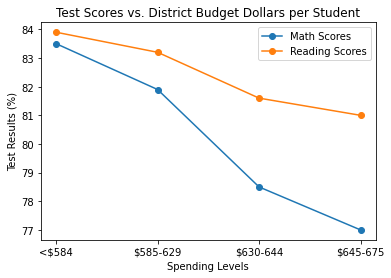

In [437]:
import matplotlib.pyplot as plt # For creating the simple plot
import numpy as np
%matplotlib inline

x_axis = ["<$584", "$585-629","$630-644", "$645-675"]
ave_math =[83.5, 81.9, 78.5, 77.0]
ave_read = [83.9, 83.2, 81.6, 81.0]
math_pct = [93.5, 87.1, 73.5, 66.2 ]

plt.plot(x_axis, ave_math, ave_read, marker="o")
plt.legend(labels = ['Math Scores','Reading Scores'])
plt.xlabel('Spending Levels')
plt.ylabel('Test Results (%)')
plt.title("Test Scores vs. District Budget Dollars per Student")
plt.show()

## Additional Data Descriptions for 9th Graders

In [438]:
# re-load in original student dataset
student_data_df = pd.read_csv(student_data_to_load)
student_data_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


In [439]:
#describe THS 9th Graders

ths_nineth_df = student_data_df[(student_data_df["grade"] == "9th") & (student_data_df["school_name"] == "Thomas High School")]
del ths_nineth_df['Student ID']
ths_nineth_df.describe()

,reading_score,math_score
count,461.000000,461.000000
mean,83.728850,83.590022
std,8.817609,9.337805
min,69.000000,68.000000
25%,76.000000,76.000000
50%,83.000000,83.000000
75%,91.000000,92.000000
max,99.000000,99.000000


In [440]:
#describe non-THS 9th Graders

non_ths_nineth_df = student_data_df[(student_data_df["grade"] == "9th") & (student_data_df["school_name"] != "Thomas High School")]
del non_ths_nineth_df['Student ID']
non_ths_nineth_df.describe()

,reading_score,math_score
count,10947.000000,10947.000000
mean,81.837946,78.739655
std,10.267607,12.344616
min,63.000000,55.000000
25%,73.000000,69.000000
50%,82.000000,79.000000
75%,91.000000,89.000000
max,99.000000,99.000000


In [441]:
non_ths_nineth_charter_df = non_ths_nineth_df[(non_ths_nineth_df["school_name"] == "Cabrera High School") |
                                              (non_ths_nineth_df["school_name"] == "Griffin High School") |
                                              (non_ths_nineth_df["school_name"] == "Wilson High School") |
                                              (non_ths_nineth_df["school_name"] == "Pena High School") |
                                              (non_ths_nineth_df["school_name"] == "Wright High School") |
                                              (non_ths_nineth_df["school_name"] == "Shelton High School") |
                                              (non_ths_nineth_df["school_name"] == "Holden High School")]

                                               
non_ths_nineth_charter_df.describe()

,reading_score,math_score
count,3010.000000,3010.000000
mean,83.806977,83.113953
std,8.877417,9.230585
min,69.000000,68.000000
25%,76.000000,75.000000
50%,84.000000,83.000000
75%,91.000000,91.000000
max,99.000000,99.000000
